### **Setup**

In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split
import numpy as np
import time

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from numpy import interp
from cycler import cycler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from sklearn.pipeline import Pipeline
from keras import Model
#!pip install -U -q keras_pandas

Using TensorFlow backend.


In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve
from matplotlib import pyplot as plt
from matplotlib import pylab
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link='https://drive.google.com/open?id=1rvK9VEiMzjn1Uw02nqL6gHFfG5XYiBkq'

In [ ]:
link2='https://drive.google.com/open?id=1oPWoXWzHwotVX_mt7mzCPtLJI_jjbxTZ'

In [ ]:
fluff, id = link.split('=')

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('labeled_data.csv')  
items = pd.read_csv('labeled_data.csv')

In [ ]:
fluff, id = link2.split('=')

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('labeled_data.csv')  
reviews = pd.read_csv('labeled_data.csv')

In [ ]:
reviews['title']= reviews['title'].astype('str')
reviews['body']=reviews['body'].astype('str')
reviews['name']=reviews['name'].astype('str')
reviews=reviews.drop(labels=['date','name'],axis=1)
reviews['asin']=reviews['asin'].astype('category')
reviews['rating']=reviews['rating'].astype('category')


In [ ]:
reviews = pd.merge(reviews, items, how="left", left_on="asin", right_on="asin")

In [ ]:
reviews.rename(columns={"rating_x": "rating", "title_x": "title", "title_y": "item_title", "rating_y": "overall_rating"}, inplace=True)

In [ ]:
link3='https://drive.google.com/open?id=1A8SJoLqZ6Wd7JNwezrlXlKlAP1SRB9me'

In [ ]:
fluff, id = link3.split('=')

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('reviews_with_sentiment_scores.csv')  
rev_clean = pd.read_csv('reviews_with_sentiment_scores.csv')

In [ ]:
rev_clean["rating"] = rev_clean["rating"].astype("category")
rev_clean["clean_text"] = rev_clean["clean_text"].astype("str")
rev_clean["title"] = rev_clean["title"].astype("str")


In [ ]:
train, test = train_test_split(rev_clean,test_size=.20)

### **Defined Functions**

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator

# Define a function to create a wordcloud from dictionary of word frequency
def wordcloud_from_frequency(word_freq_dict, title, figure_size=(10, 6)):
    wordcloud.generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    
# Define a function to plot top10 positive words and top10 negative words in a grouped bar plot (from dictionaries)
def topn_wordfreq_bar_both(pos_word_freq_dict, neg_word_freq_dict, pos_num_doc, neg_num_doc, topn, title, palette, height=6, aspect=2):
    # Transform positive word frequency into DF
    df_pos = pd.DataFrame.from_dict(pos_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_pos.columns = ["frequency"]
    df_pos["frequency"] = df_pos["frequency"] / pos_num_doc
    df_pos["label"] = "Positive"
    # Transform negative word frequency into DF
    df_neg = pd.DataFrame.from_dict(neg_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_neg.columns = ["frequency"]
    df_neg["frequency"] = df_neg["frequency"] / neg_num_doc
    df_neg["label"] = "Negative"
    # Append two dataframes
    df_append = df_pos.append(df_neg)
    df_append.reset_index(inplace=True)
    # Plot
    sns.catplot(x="index", y="frequency", hue="label", data=df_append, 
                kind="bar",
                palette=palette,
                height=height, aspect=aspect, 
                legend_out=False)
    plt.title(title)
    plt.show()

In [ ]:
def word_freq_dict(text):
    # Convert text into word list
    wordList = text.split()
    # Generate word freq dictionary
    wordFreqDict = {word: wordList.count(word) for word in wordList}
    return wordFreqDict


### **Processing**

In [ ]:
import nltk
from nltk import word_tokenize
from nltk import WordNetLemmatizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string
stop = set(stopwords.words('english'))
punc = set(string.punctuation)
keywords = reviews["brand"].apply(lambda x: x.lower()).unique().tolist()
keywords.append("phone")
lemma = WordNetLemmatizer()
def clean_text(text):
    # Convert the text into lowercase
    text = text.lower()
    # Split into list
    wordList = text.split()
    # Remove punctuation
    wordList = ["".join(x for x in word if (x=="'")|(x not in punc)) for word in wordList]
    # Remove stopwords
    wordList = [word for word in wordList if word not in stop]
    # Remove other keywords
    wordList = [word for word in wordList if word not in keywords]
    # Lemmatisation
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)

In [ ]:
reviews["body"] = reviews["body"].astype("str")
reviews["clean_text"] = reviews["body"].apply(clean_text)
reviews["title"] = reviews["title"].astype("str")
reviews["clean_title"] = reviews["title"].apply(clean_text)

In [ ]:
le = LabelEncoder()
le.fit(list(reviews['asin'].unique()))
reviews['asin']=le.transform(reviews['asin'])

In [ ]:
reviews['helpfulVotes']=reviews['helpfulVotes'].replace(np.nan,0)

In [ ]:
rev_clean.shape

(73871, 23)

In [ ]:
#reviews['clean_text']=reviews['clean_text']+' '+reviews['clean_title']

### **EDA**

In [ ]:
reviews["positivity"] = reviews["rating"].apply(lambda x: 1 if x>3 else(0 if x==3 else -1))

In [ ]:
reviews.groupby('rating').count()

,asin,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,prices,clean_text,clean_title,positivity
rating,,,,,,,,,,,,,,,,
1,16429,16429,16429,16429,16429,16429,16429,16429,16429,16429,16429,16429,11664,16429,16429,16429
2,4907,4907,4907,4907,4907,4907,4907,4907,4907,4907,4907,4907,3424,4907,4907,4907
3,5757,5757,5757,5757,5757,5757,5757,5757,5757,5757,5757,5757,4066,5757,5757,5757
4,10710,10710,10710,10710,10710,10710,10710,10710,10710,10710,10710,10710,7432,10710,10710,10710
5,45012,45012,45012,45012,45012,45012,45012,45012,45012,45012,45012,45012,32559,45012,45012,45012


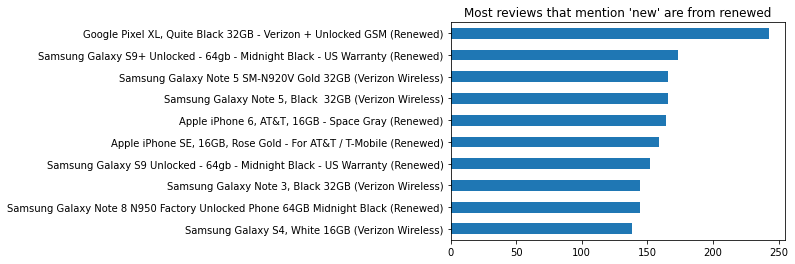

In [ ]:
reviews[reviews["clean_text"].apply(lambda x: "new" in x)]["item_title"].value_counts().sort_values(ascending=True).tail(10).plot(kind="barh")
plt.title("Most reviews that mention 'new' are from renewed")
plt.show()

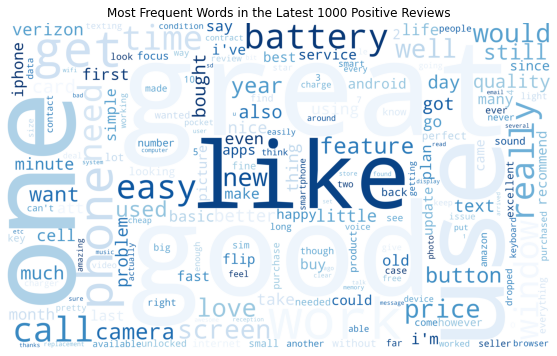

In [ ]:
# 2.4 Plot wordclouds for latest 1000 reviews for Apple
all_pos = " ".join(reviews[reviews["positivity"]==1]["clean_text"][0:1000])
all_pos_word_freq = word_freq_dict(all_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Blues",
                      background_color="white")
wordcloud_from_frequency(all_pos_word_freq, "Most Frequent Words in the Latest 1000 Positive Reviews")

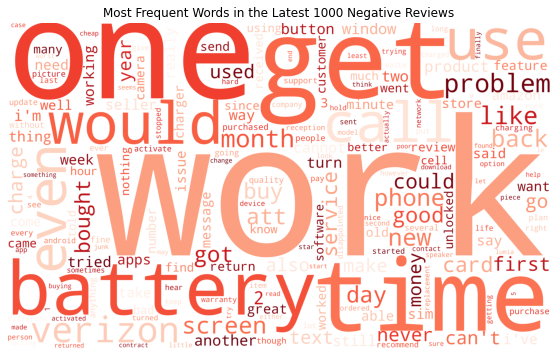

In [ ]:
# 2.4 Plot wordclouds for latest 1000 reviews for Apple
all_neg = " ".join(reviews[reviews["positivity"]==-1]["clean_text"][0:1000])
all_neg_word_freq = word_freq_dict(all_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Reds",
                      background_color="white")
wordcloud_from_frequency(all_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews")

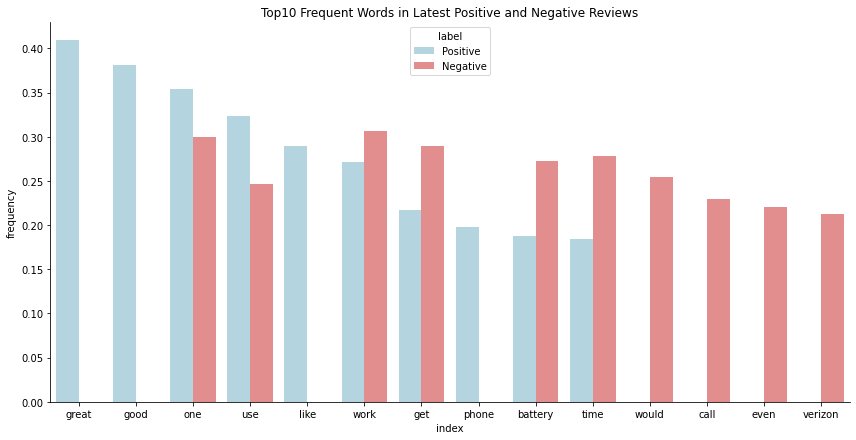

In [ ]:
topn_wordfreq_bar_both(all_pos_word_freq, all_neg_word_freq, 
                       min(sum(reviews["positivity"]==1), 1000), 
                       min(sum(reviews["positivity"]==-1), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews", 
                       ["lightblue", "lightcoral"], height=6, aspect=2)

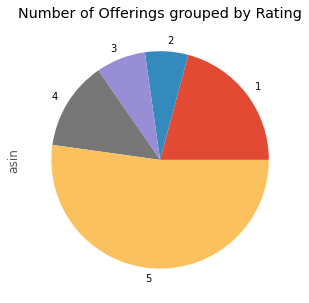

In [ ]:
plt.style.use("ggplot")
# Brand distribution
ax = rev_clean.groupby("rating").count()["asin"].plot(kind="pie", 
                                                 figsize=(8, 5),
                                                 title="Number of Offerings grouped by Rating")
plt.show()

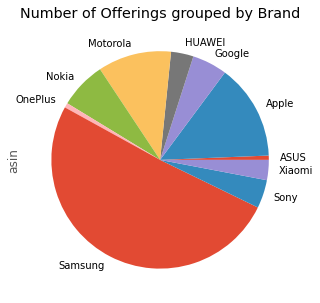

In [ ]:
plt.style.use("ggplot")
# Brand distribution
ax = rev_clean.groupby("brand").count()["asin"].plot(kind="pie", 
                                                 figsize=(8, 5),
                                                 title="Number of Offerings grouped by Brand")
plt.show()

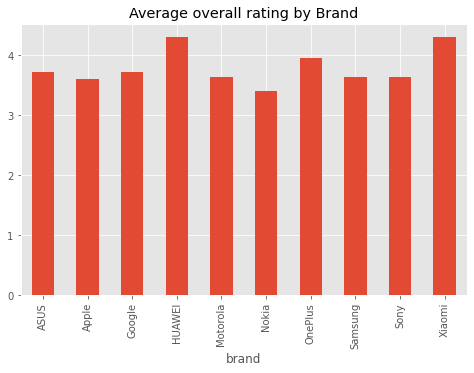

In [ ]:
plt.style.use("ggplot")
# Brand distribution
ax = rev_clean.groupby("brand").mean()["overall_rating"].plot(kind="bar", 
                                                 figsize=(8, 5),
                                                 title="Average overall rating by Brand")
plt.show()

### **Sentiment Analysis**

In [ ]:
!pip install -U -q langdetect

     |████████████████████████████████| 983kB 2.8MB/s 


In [ ]:
from langdetect import detect
def lang_detect(text):
  try:
    return detect(text)
  except:
    return None


start_time = time.time()
reviews["lang"] = reviews["body"].apply(lang_detect)
print("It takes %s seconds for the code to finish." % (time.time() - start_time))

It takes 408.30588603019714 seconds for the code to finish.


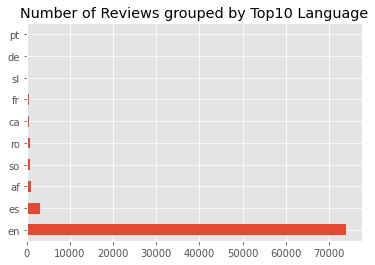

In [ ]:
reviews["lang"].value_counts()[:10].plot(kind="barh", title="Number of Reviews grouped by Top10 Language")
plt.show()

In [ ]:
reviews = reviews[reviews["lang"]=="en"]

In [ ]:
nltk.download('vader_lexicon')

NameError: ignored

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
#analyzer.polarity_scores("The weather is nice today.")

In [ ]:
start_time = time.time()
reviews['body'] = reviews["body"].astype("str")
reviews["sent_neg"] = reviews["body"].apply(lambda x: analyzer.polarity_scores(x)["neg"])
reviews["sent_nue"] = reviews["body"].apply(lambda x: analyzer.polarity_scores(x)["neu"])
reviews["sent_pos"] = reviews["body"].apply(lambda x: analyzer.polarity_scores(x)["pos"])
reviews["sent_comp"] = reviews["body"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
print("It takes %s seconds for the code to finish." % (time.time() - start_time))

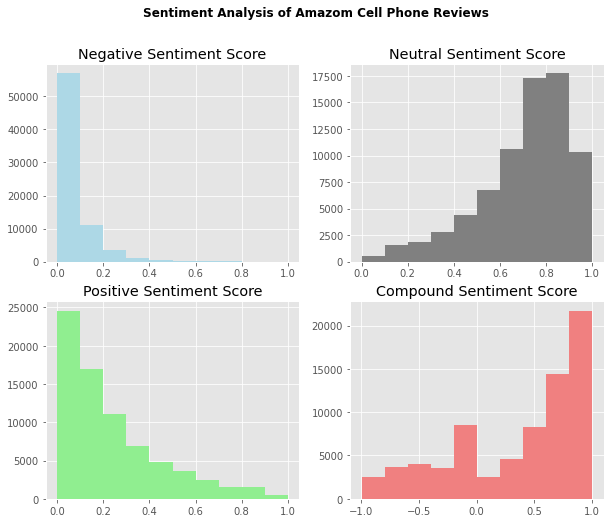

In [ ]:
plt.figure()

plt.subplot(2, 2, 1)
reviews[reviews['lang']=='en']["sent_neg"].hist(figsize=(10, 8), color="lightblue")
plt.title("Negative Sentiment Score")
plt.subplot(2, 2, 2)
reviews[reviews['lang']=='en']["sent_neu"].hist(figsize=(10, 8), color="grey")
plt.title("Neutral Sentiment Score")
plt.subplot(2, 2, 3)
reviews[reviews['lang']=='en']["sent_pos"].hist(figsize=(10, 8), color="lightgreen")
plt.title("Positive Sentiment Score")
plt.subplot(2, 2, 4)
reviews[reviews['lang']=='en']["sent_comp"].hist(figsize=(10, 8), color="lightcoral")
plt.title("Compound Sentiment Score")

plt.suptitle('Sentiment Analysis of Amazom Cell Phone Reviews', fontsize=12, fontweight='bold');

plt.show()

The correlation coefficient between sentiment score (compound) and rating is  0.6094 with a p-value of  0.0000.


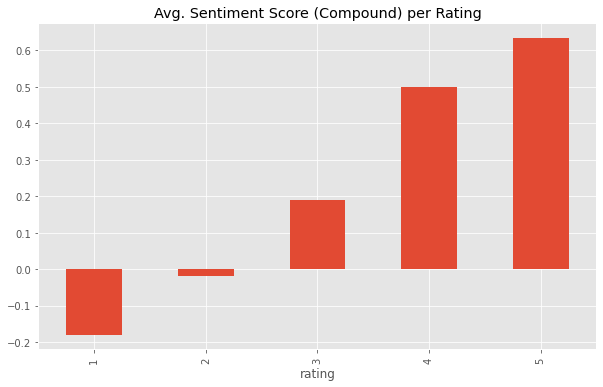

In [ ]:
import numpy as np
import scipy.stats as stats
print("The correlation coefficient between sentiment score (compound) and rating is {0[0]: .4f} with a p-value of {0[1]: .4f}.".format(stats.pearsonr(reviews[reviews['lang']=='en']["rating"], reviews[reviews['lang']=='en']["sent_comp"])))
reviews[reviews['lang']=='en'].groupby("rating").mean()["sent_comp"].plot(kind="bar", figsize=(10, 6))
plt.title("Avg. Sentiment Score (Compound) per Rating")
plt.show()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


KeyboardInterrupt: ignored

In [ ]:
reviews.to_csv("/content/drive/My Drive/Data 102/reviews_with_sentiment_scores.csv")

### **Pipeline**

In [ ]:
from mlxtend.feature_selection import ColumnSelector

In [ ]:
def flatten(l):
  flat_list = []
  for sublist in l:
      for item in sublist:
          flat_list.append(item)
  return flat_list

In [ ]:
def Dict_Converter(df):
    df.to_dict('list')
    return df

In [ ]:
class ItemSelector(BaseEstimator, TransformerMixin):   
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self,data_dict):
        return data_dict[self.key]

In [ ]:
#Pipeline
pipeline = Pipeline([
    # Use FeatureUnion to combine the features from subject and body
    ('union', FeatureUnion(
        transformer_list=[
                        
                ('title', Pipeline([
                ('selector', ItemSelector(key='clean_title')),
                ('tfidf', TfidfVectorizer(min_df=50)),
                ])),    

                ('body', Pipeline([
                ('selector', ItemSelector(key='clean_text')),
                ('tfidf', TfidfVectorizer()),
                ('best', TruncatedSVD(n_components=50)),
                ])),   

                ('PCA',PCA(n_components=2)),
                ('univ_select',SelectKBest(k=1))
              ],

        # weight components in FeatureUnion
        transformer_weights={
            'title': 1,
            'body': 0.8,
            'PCA': .5,
            'univ_select':.5
        },
    )),

    # Use a SVC classifier on the combined features
    ('svc', SVC(kernel='linear')),
])


In [ ]:
#Pipeline
pipe2 = Pipeline([
    # Use FeatureUnion to combine the features from subject and body
    ('union', FeatureUnion(
        transformer_list=[
                        
                ('title', Pipeline([
                ('selector', flatten(ColumnSelector(cols='clean_title'))),
                ('tfidf', TfidfVectorizer(min_df=50)),
                ])),    

                ('body', Pipeline([
                ('selector', flatten(ColumnSelector(cols='clean_text'))),
                ('tfidf', TfidfVectorizer()),
                ('best', TruncatedSVD(n_components=50)),
                ])),   

                ('PCA',PCA(n_components=2)),
                ('univ_select',SelectKBest(k=1))
              ],

        # weight components in FeatureUnion
        transformer_weights={
            'title': 1,
            'body': 0.8,
            'PCA': .5,
            'univ_select':.5
        },
    )),

    # Use a SVC classifier on the combined features
    ('svc', SVC(kernel='linear')),
])


In [ ]:
#train=train.to_numpy()
#test=test.to_numpy()

In [ ]:
col_selector = ColumnSelector(cols=("title"))
#print(col_selector.transform(reviews))
flatten(col_selector.transform(reviews))

### **Misc Clean**

In [ ]:
vectorizer = TfidfVectorizer()
train_title_vect=vectorizer.fit_transform(train['title'])
test_title_vect=vectorizer.transform(test['title'])

In [ ]:
vectorizer = TfidfVectorizer()
train_body_vect=vectorizer.fit_transform(train['clean_text'])
test_body_vect=vectorizer.transform(test['clean_text'])

In [ ]:
train['title']=list(train_title_vect.toarray())

In [ ]:
test['title']=list(test_title_vect.toarray())


In [ ]:
train['body']=list(train_body_vect.toarray())

In [ ]:
test['body']=list(test_body_vect.toarray())

In [ ]:
train['title'].head(10)

### **Metrics**

In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)

In [ ]:
def multiclass_roc_curve(y_test, y_pred, average="macro"):
  y_test = label_binarize(y_test, classes=[1, 2,3,4,5])
  y_pred = label_binarize(y_pred, classes=[1, 2,3,4,5])
  n_classes=5
  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
  
  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(1,n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
  
  lw=2
  plt.figure(figsize=(14,10))
  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  
  
  # Plot all ROC curves
  
  plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

  plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

  colors = ['aqua', 'darkorange', 'cornflowerblue','green','yellow']
  for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Some extension of Receiver operating characteristic to multi-class')
  plt.legend(loc="lower right")

  plt.show()

### **Model Execution**

In [ ]:
rev_clean[rev_clean['overall_rating']<2.5].head(5)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [ ]:
pipeline.fit(train.drop('rating',axis=1), train['rating'])
y = pipeline.predict(test.drop('rating',axis=1))
print(classification_report(y, test['rating']))

In [ ]:
#Linear SVC
t0=time.time()
SGDC=SGDClassifier(loss='hinge',max_iter=100)
SGDC.fit(train_body_vect,train['rating'])
#(accuracy_score(SGDC.predict(vectors_testc),testc['class']))
(print(classification_report(SGDC.predict(test_body_vect),test['rating'])))
t1=time.time()
total = t1-t0
print(total)

In [ ]:
 multiclass_roc_curve(SGDC.predict(test_body_vect),test['rating'])

In [ ]:
t0=time.time()
#cleaned
abc = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=40)
abc.fit(train['sent_comp'].to_numpy().reshape(-1,1),train['rating'])
#(accuracy_score(abc.predict(vectors_testc),testc['class']))
#print(confusion_matrix(bc.predict(test_df.drop('target',axis=1)),test_df['target']))
print(classification_report(abc.predict(test['sent_comp'].to_numpy().reshape(-1,1)),test['rating']))
t1=time.time()
total = t1-t0
print(total)

In [ ]:
t0=time.time()
#cleaned
abc = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=40)
abc.fit(train[['sent_comp','sent_pos','sent_neg','sent_neu','asin','brand']],train['rating'])
#(accuracy_score(abc.predict(vectors_testc),testc['class']))
#print(confusion_matrix(bc.predict(test_df.drop('target',axis=1)),test_df['target']))
print(classification_report(abc.predict(test[['sent_comp','sent_pos','sent_neg','sent_neu','asin','brand']]),test['rating']))
t1=time.time()
total = t1-t0
print(total)

### **RNN**

In [ ]:
reviews.head(1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Embedding, LSTM, GRU, Input,Bidirectional
from keras.layers import Conv2D, MaxPooling2D, Conv1D,MaxPooling1D
from keras import backend as k
from keras.preprocessing.text import Tokenizer, hashing_trick
from keras.preprocessing.sequence import pad_sequences

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [ ]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [ ]:
#train, test = train_test_split(rev_clean[['clean_text','rating']])
#n_outputs
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(train.clean_text.values)
train_X = pad_sequences(tokenizer.texts_to_sequences(train.clean_text.values), 64)
test_X = pad_sequences(tokenizer.texts_to_sequences(test.clean_text.values),64)
train_Y=tf.keras.utils.to_categorical(train['rating'], num_classes=6)
test_Y=tf.keras.utils.to_categorical(test['rating'], num_classes=6)

In [ ]:
embed_dim = 128
lstm_out = 196
max_features = 2000
model = Sequential()
model.add(Embedding(tokenizer.num_words,64))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',f1_m,precision_m, recall_m])


In [ ]:
batch_size = 32
model.fit( train_X,#.reshape((train_X.shape[0], train_X.shape[1],1)), 
          train_Y,
          epochs = 5, 
          batch_size=batch_size, 
          verbose = 1, 
          validation_data=(test_X, test_Y))

In [ ]:
best=model.predict_classes(test_X, verbose=1)
multiclass_roc_auc_score(best,test['rating'])

In [ ]:
 multiclass_roc_curve(best,test['rating'])

In [ ]:
(print(classification_report(best,test['rating'])))

In [ ]:
feature_columns = []

# numeric cols
for header in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']:
  feature_columns.append(feature_column.numeric_column(header))

# bucketized cols
age_buckets = feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
feature_columns.append(age_buckets)



# crossed cols
crossed_feature = feature_column.crossed_column([age_buckets, thal], hash_bucket_size=1000)
crossed_feature = feature_column.indicator_column(crossed_feature)
feature_columns.append(crossed_feature)

In [ ]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = datafrane.copy()
  labels = datafrane.pop('rating')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds